# Air Quality Prediction using Machine Learning

In this machine learning project, we use multiple publically available datasets to better predict the air quality in the capital city of Delhi, India. We look at the correlation between weather conditions and the Air Quality Index. 

The data is imported from a .csv file that has both air quality and weather data for the city from 2015 to April 2020. The data is synoptic(3-hourly). 

* The Air Quality Data is obtained from a Kaggle dataset that uses publicly available data provided by the [Central Pollution Control Board](https://cpcb.nic.in/). 

* The Weather Data is obtained from the [Reliable Prognosis Weather Archive](https://rp5.ru/Weather_archive_in_New_Delhi,_Safdarjung_(airport)), for the Safdarjung weather station in Delhi. 

In total, the dataset contains over 15,000 rows.

In [12]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns

#Seaborn beautifiers for plotting 
sns.set(font= 'Nirmala UI',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context('notebook', rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})
plt.rcParams["figure.figsize"] = [16,9]

In [4]:
df = pd.read_csv('final_dataset.csv')

In [5]:
df.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Category,Month,Day,Hour,Temp,Rel_Humidity,Wind_Direction,Wind_Speed
0,2020-04-30 23:00:00,59.68,122.26,13.00,29.68,29.70,33.57,1.00,14.41,29.85,145.0,Moderate,4,30,23,28.0,70.0,Wind blowing from the north-east,2.0
1,2020-04-30 20:00:00,50.73,190.73,18.08,19.29,28.60,33.13,0.78,15.46,69.34,149.0,Moderate,4,30,20,30.2,65.0,Wind blowing from the east,1.0
2,2020-04-30 17:00:00,42.53,108.07,19.01,15.48,10.95,34.14,0.81,21.66,94.92,145.0,Moderate,4,30,17,36.6,46.0,Wind blowing from the north-east,3.0
3,2020-04-30 14:00:00,47.40,109.09,14.91,14.41,23.49,31.32,0.83,20.95,91.61,136.0,Moderate,4,30,14,37.8,40.0,Wind blowing from the north-west,3.0
4,2020-04-30 11:00:00,63.73,132.04,9.85,15.65,18.34,33.20,0.84,20.07,69.94,117.0,Moderate,4,30,11,34.6,50.0,Wind blowing from the south-east,3.0


In [6]:
df.dtypes

Date               object
PM2.5             float64
PM10              float64
NO                float64
NO2               float64
NOx               float64
NH3               float64
CO                float64
SO2               float64
O3                float64
AQI               float64
AQI_Category       object
Month               int64
Day                 int64
Hour                int64
Temp              float64
Rel_Humidity      float64
Wind_Direction     object
Wind_Speed        float64
dtype: object

# Exploratory Data Analysis

Let us see what features affect the PM 2.5 levels through visualizations.

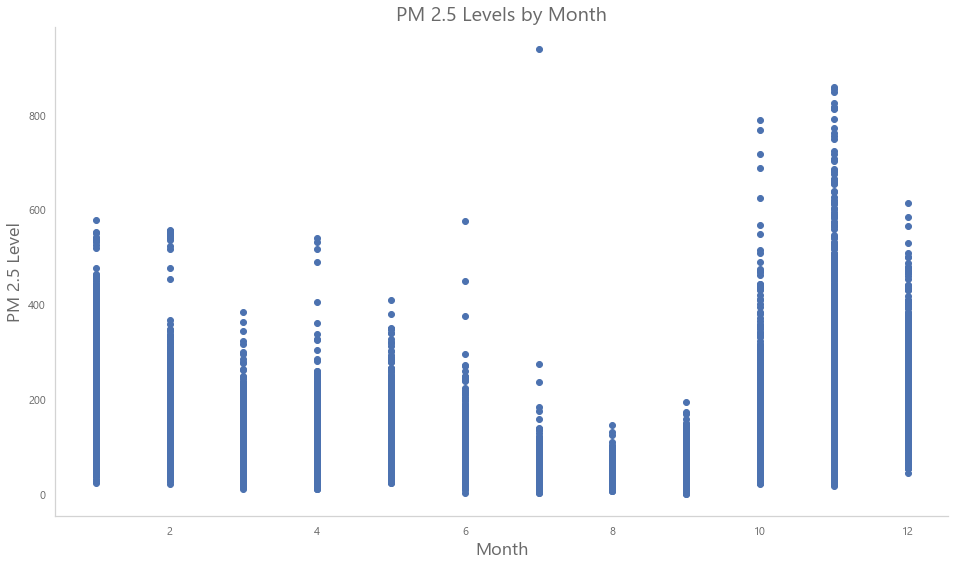

In [18]:
x = df['Month']
y = df['PM2.5']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM 2.5 Level')
plt.title('PM 2.5 Levels by Month')
plt.show()

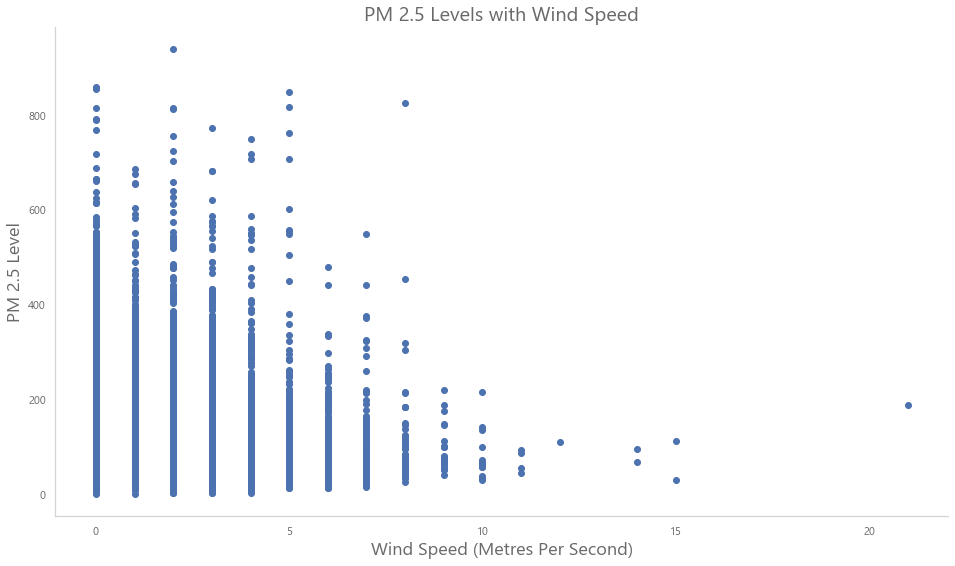

In [19]:
x = df['Wind_Speed']
y = df['PM2.5']
plt.scatter(x,y)
plt.xlabel('Wind Speed (Metres Per Second)')
plt.ylabel('PM 2.5 Level')
plt.title('PM 2.5 Levels with Wind Speed')
plt.show()

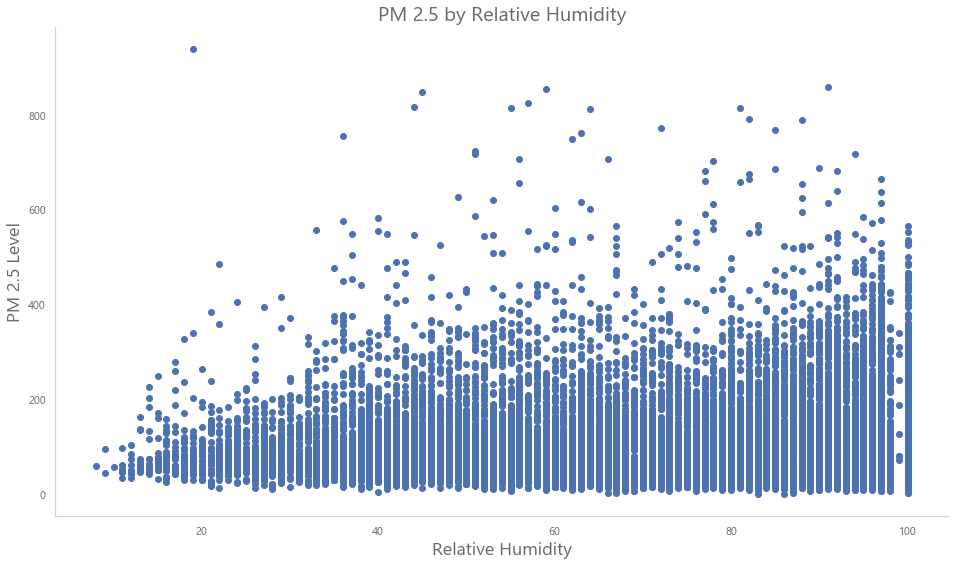

In [22]:
x = df['Rel_Humidity']
y = df['PM2.5']
plt.scatter(x,y)
plt.xlabel('Relative Humidity')
plt.ylabel('PM 2.5 Level')
plt.title('PM 2.5 by Relative Humidity')
plt.show()

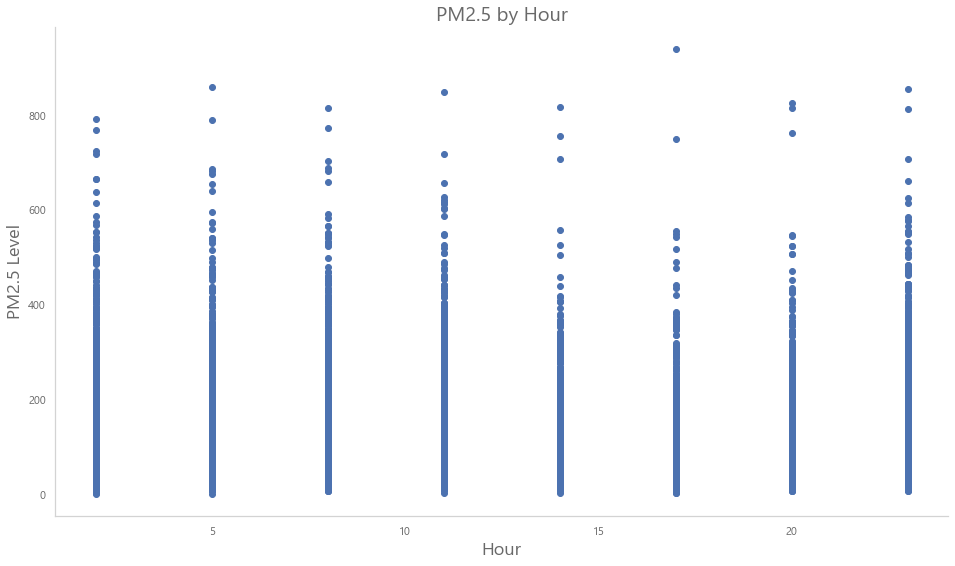

In [24]:
x = df['Hour']
y = df['PM2.5']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

In [27]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df['Day_of_The_Week'] = df['Date'].dt.day_name()

In [31]:
load = df[['PM2.5', 'Day_of_The_Week']].groupby(['Day_of_The_Week']).mean()

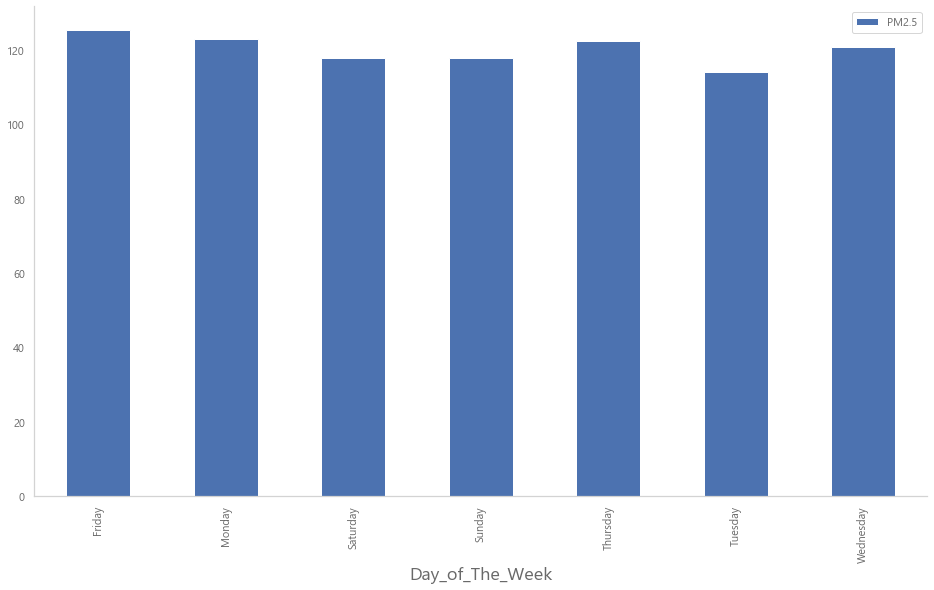

In [32]:
load.plot(kind='bar')

## Initial Observations

* From the graphs we can observe that in the winter months of October, November and December the PM 2.5 levels reach their highest levels. This makes Month a good predictor. 

* However, Hour and Day of the Week are not that good as PM 2.5 predictors. 

* With higher wind speeds the PM 2.5 levels decrease. Can't tell for Relative Humidity. 

# Cleaning the Data

Let us first minimize the number of attributes. Since we are only considering PM 2.5 levels at the moment, we can get rid of all other pollutants. 

In [53]:
df.columns

Index(['Date', 'PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'AQI', 'AQI_Category', 'Month', 'Day', 'Hour', 'Temp', 'Rel_Humidity',
       'Wind_Direction', 'Wind_Speed'],
      dtype='object')

In [55]:
df2 = df.drop(labels=['PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3','AQI','AQI_Category','Day','Wind_Direction'], axis=1)

In [56]:
df2.head()

,Date,PM25,Month,Hour,Temp,Rel_Humidity,Wind_Speed
0,2020-04-30 23:00:00,59.68,4,23,28.0,70.0,2.0
1,2020-04-30 20:00:00,50.73,4,20,30.2,65.0,1.0
2,2020-04-30 17:00:00,42.53,4,17,36.6,46.0,3.0
3,2020-04-30 14:00:00,47.40,4,14,37.8,40.0,3.0
4,2020-04-30 11:00:00,63.73,4,11,34.6,50.0,3.0


## Creating Previous Value Features
Using weather conditions of the previous 5 instances leading to the current instance will give our model more features to work with and will better improve accuracy.

In [57]:
# Creating Previous Value Features 
df2['Value_1'] = df2.PM25.shift(periods=1)
df2['TEMP_1'] = df2.Temp.shift(periods=1)
df2['SPD_1'] = df2.Wind_Speed.shift(periods=1)
df2['HUM_1'] = df2.Rel_Humidity.shift(periods=1)

df2['Value_2'] = df2.PM25.shift(periods=2)
df2['TEMP_2'] = df2.Temp.shift(periods=2)
df2['SPD_2'] = df2.Wind_Speed.shift(periods=2)
df2['HUM_2'] = df2.Rel_Humidity.shift(periods=2)

df2['Value_3'] = df2.PM25.shift(periods=3)
df2['TEMP_3'] = df2.Temp.shift(periods=3)
df2['SPD_3'] = df2.Wind_Speed.shift(periods=3)
df2['HUM_3'] = df2.Rel_Humidity.shift(periods=3)

df2['Value_4'] = df2.PM25.shift(periods=4)
df2['TEMP_4'] = df2.Temp.shift(periods=4)
df2['SPD_4'] = df2.Wind_Speed.shift(periods=4)
df2['HUM_4'] = df2.Rel_Humidity.shift(periods=4)

df2['Value_5'] = df2.PM25.shift(periods=5)
df2['TEMP_5'] = df2.Temp.shift(periods=5)
df2['SPD_5'] = df2.Wind_Speed.shift(periods=5)
df2['HUM_5'] = df2.Rel_Humidity.shift(periods=5)

In [60]:
df2.head(10)

,Date,PM25,Month,Hour,Temp,Rel_Humidity,Wind_Speed,Value_1,TEMP_1,SPD_1,...,SPD_3,HUM_3,Value_4,TEMP_4,SPD_4,HUM_4,Value_5,TEMP_5,SPD_5,HUM_5
0,2020-04-30 23:00:00,59.68,4,23,28.0,70.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-30 20:00:00,50.73,4,20,30.2,65.0,1.0,59.68,28.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-30 17:00:00,42.53,4,17,36.6,46.0,3.0,50.73,30.2,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-30 14:00:00,47.40,4,14,37.8,40.0,3.0,42.53,36.6,3.0,...,2.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-30 11:00:00,63.73,4,11,34.6,50.0,3.0,47.40,37.8,3.0,...,1.0,65.0,59.68,28.0,2.0,70.0,NaN,NaN,NaN,NaN
5,2020-04-30 08:00:00,50.71,4,8,28.2,76.0,2.0,63.73,34.6,3.0,...,3.0,46.0,50.73,30.2,1.0,65.0,59.68,28.0,2.0,70.0
6,2020-04-30 05:00:00,43.42,4,5,26.4,80.0,2.0,50.71,28.2,2.0,...,3.0,40.0,42.53,36.6,3.0,46.0,50.73,30.2,1.0,65.0
7,2020-04-30 02:00:00,47.57,4,2,27.0,77.0,3.0,43.42,26.4,2.0,...,3.0,50.0,47.40,37.8,3.0,40.0,42.53,36.6,3.0,46.0
8,2020-04-29 23:00:00,60.57,4,23,28.4,70.0,2.0,47.57,27.0,3.0,...,2.0,76.0,63.73,34.6,3.0,50.0,47.40,37.8,3.0,40.0
9,2020-04-29 20:00:00,58.18,4,20,30.2,61.0,1.0,60.57,28.4,2.0,...,2.0,80.0,50.71,28.2,2.0,76.0,63.73,34.6,3.0,50.0


In [62]:
#Remove outliers (PM 2.5 values should be in the range 1-500)
df2 = df2[df2.PM25<=500]
df2.shape

(14943, 27)

In [63]:
#Only taking data till before the 2020 pandemic caused a nationwide lockdown
df2 = df2[df2.Date<='2020-03-24']
df2.shape

(14704, 27)

## Handling NaNs


In [64]:
# Are there null values in our dataset?
df2.isnull().values.any()

True

In [70]:
# 1. Check if Date, Month, or Hour have NaNs
print("Date contains NaNs:", df2.Date.isnull().values.any())
print("Month contains NaNs:", df2.Month.isnull().values.any())
print("Hour contains NaNs:", df2.Hour.isnull().values.any())

Date contains NaNs: False
Month contains NaNs: False
Hour contains NaNs: False


In [68]:
# 2. Drop any row where PM 2.5 level is missing

# Show rows where value is NaN
df2[df2['PM25'].isnull()]

,Date,PM25,Month,Hour,Temp,Rel_Humidity,Wind_Speed,Value_1,TEMP_1,SPD_1,...,SPD_3,HUM_3,Value_4,TEMP_4,SPD_4,HUM_4,Value_5,TEMP_5,SPD_5,HUM_5


In [69]:
df2 = df2.dropna(axis=0,subset=['PM25'])
df2.shape

(14704, 27)

In [73]:
print("Temperature contains NaNs:", df2.Temp.isnull().values.any())

Temperature contains NaNs: True


In [74]:
df2[df2['Temp'].isnull()].shape

(40, 27)

In [76]:
# Show rows where DEWP & TEMP is NaN
df2[df2['Rel_Humidity'].isnull() & df2['Temp'].isnull()].head(20)

,Date,PM25,Month,Hour,Temp,Rel_Humidity,Wind_Speed,Value_1,TEMP_1,SPD_1,...,SPD_3,HUM_3,Value_4,TEMP_4,SPD_4,HUM_4,Value_5,TEMP_5,SPD_5,HUM_5
761,2019-12-23 14:00:00,187.46,12,14,NaN,NaN,21.0,200.04,12.4,1.0,...,0.0,100.0,210.65,9.4,2.0,95.0,215.88,9.2,2.0,92.0
940,2019-11-30 17:00:00,72.57,11,17,NaN,NaN,0.0,92.53,14.6,1.0,...,0.0,100.0,122.81,8.6,0.0,100.0,130.77,8.6,0.0,100.0
1546,2019-09-14 08:00:00,24.75,9,8,NaN,NaN,NaN,34.65,33.0,2.0,...,2.0,63.0,25.44,30.8,1.0,76.0,26.45,30.0,2.0,80.0
2049,2019-12-07 11:00:00,81.87,7,11,NaN,NaN,7.0,122.92,24.2,1.0,...,0.0,96.0,94.13,12.8,0.0,96.0,76.43,32.6,2.0,62.0
2727,2019-04-16 17:00:00,39.91,4,17,NaN,NaN,NaN,30.07,23.0,4.0,...,4.0,62.0,12.19,20.8,1.0,82.0,31.72,23.6,5.0,66.0
3617,2018-12-25 08:00:00,252.67,12,8,NaN,NaN,0.0,270.87,16.2,2.0,...,2.0,75.0,270.89,11.0,1.0,97.0,332.64,9.0,1.0,100.0
4207,2018-11-10 05:00:00,95.28,10,5,NaN,NaN,14.0,92.26,25.0,1.0,...,2.0,40.0,35.61,24.0,0.0,66.0,37.10,17.4,0.0,90.0
4340,2018-09-24 02:00:00,14.13,9,2,NaN,NaN,NaN,14.66,24.4,3.0,...,2.0,92.0,25.70,26.8,1.0,89.0,24.62,25.2,4.0,91.0
4416,2018-09-14 11:00:00,30.79,9,11,NaN,NaN,4.0,31.61,34.4,4.0,...,0.0,75.0,47.34,28.2,0.0,85.0,56.44,27.4,2.0,76.0
4436,2018-11-09 23:00:00,34.65,9,23,NaN,NaN,NaN,29.91,11.2,0.0,...,0.0,90.0,27.02,22.2,1.0,46.0,28.48,24.6,2.0,41.0


In [78]:
# Since these are only 20 records, we can drop them
df2 = df2.dropna(axis=0,subset=['Temp', 'Rel_Humidity'])
df2.shape

(14644, 27)

In [80]:
print("Wind speed contains nulls:", df2.Wind_Speed.isnull().values.any())

Wind speed contains nulls: True


In [81]:
df2[df2['Wind_Speed'].isnull()].head(20)

,Date,PM25,Month,Hour,Temp,Rel_Humidity,Wind_Speed,Value_1,TEMP_1,SPD_1,...,SPD_3,HUM_3,Value_4,TEMP_4,SPD_4,HUM_4,Value_5,TEMP_5,SPD_5,HUM_5
714,2019-12-30 08:00:00,216.22,12,8,5.4,100.0,NaN,245.50,7.8,1.0,...,1.0,97.0,357.43,7.4,2.0,100.0,267.62,6.6,2.0,97.0
3609,2018-12-26 08:00:00,229.61,12,8,7.0,97.0,NaN,254.42,17.2,2.0,...,1.0,58.0,300.94,8.6,0.0,100.0,408.46,7.2,0.0,97.0
4608,2018-08-20 23:00:00,41.62,8,23,29.2,83.0,NaN,30.53,28.6,2.0,...,2.0,83.0,33.50,33.8,2.0,66.0,31.52,36.4,2.0,58.0
5498,2018-04-29 14:00:00,89.29,4,14,39.6,27.0,NaN,77.98,38.0,0.0,...,0.0,84.0,76.42,26.2,0.0,84.0,66.63,25.6,0.0,76.0
9149,2017-01-21 11:00:00,519.22,1,11,15.8,73.0,NaN,124.24,19.2,4.0,...,0.0,87.0,223.32,13.4,1.0,96.0,536.92,10.4,0.0,100.0
10141,2016-09-18 08:00:00,90.93,9,8,29.0,78.0,NaN,54.90,34.8,3.0,...,3.0,52.0,78.25,31.0,0.0,66.0,103.67,28.4,0.0,78.0
11052,2016-05-26 11:00:00,112.78,5,11,37.0,44.0,NaN,115.81,38.4,4.0,...,0.0,49.0,176.25,32.8,0.0,58.0,160.59,31.6,0.0,64.0
13267,2015-08-19 23:00:00,47.28,8,23,30.4,73.0,NaN,17.00,29.4,4.0,...,4.0,72.0,32.96,32.4,8.0,64.0,36.92,34.0,5.0,55.0


In [82]:
# Since these are only 8 records, we can drop them
df2 = df2.dropna(axis=0,subset=['Wind_Speed'])
df2.shape

(14636, 27)

In [89]:
df2['SPD_1'] = df2.SPD_1.fillna(value=0)
df2['SPD_2'] = df2.SPD_2.fillna(value=0)
df2['SPD_3'] = df2.SPD_3.fillna(value=0)
df2['SPD_4'] = df2.SPD_3.fillna(value=0)
df2['SPD_5'] = df2.SPD_3.fillna(value=0)

In [99]:
df2['HUM_1'] = df2.HUM_1.fillna(method='ffill')
df2['HUM_2'] = df2.HUM_2.fillna(method='ffill')
df2['HUM_3'] = df2.HUM_3.fillna(method='ffill')
df2['HUM_4'] = df2.HUM_4.fillna(method='ffill')
df2['HUM_5'] = df2.HUM_5.fillna(method='ffill')

In [116]:
df2['TEMP_1'] = df2.TEMP_1.fillna(method='ffill')
df2['TEMP_2'] = df2.TEMP_2.fillna(method='ffill')
df2['TEMP_3'] = df2.TEMP_3.fillna(method='ffill')
df2['TEMP_4'] = df2.TEMP_4.fillna(method='ffill')
df2['TEMP_5'] = df2.TEMP_5.fillna(method='ffill')

In [118]:
df2['Value_1'] = df2.Value_1.fillna(method='ffill')
df2['Value_2'] = df2.Value_2.fillna(method='ffill')
df2['Value_3'] = df2.Value_3.fillna(method='ffill')
df2['Value_4'] = df2.Value_4.fillna(method='ffill')
df2['Value_5'] = df2.Value_5.fillna(method='ffill')

In [119]:
# Are there null values in our dataset?
df2.isnull().values.any()

False

In [120]:
df2 = df2.reset_index(drop=True)

In [123]:
df2.shape

(14636, 27)

In [124]:
df2.dtypes

Date            datetime64[ns]
PM25                   float64
Month                    int64
Hour                     int64
Temp                   float64
Rel_Humidity           float64
Wind_Speed             float64
Value_1                float64
TEMP_1                 float64
SPD_1                  float64
HUM_1                  float64
Value_2                float64
TEMP_2                 float64
SPD_2                  float64
HUM_2                  float64
Value_3                float64
TEMP_3                 float64
SPD_3                  float64
HUM_3                  float64
Value_4                float64
TEMP_4                 float64
SPD_4                  float64
HUM_4                  float64
Value_5                float64
TEMP_5                 float64
SPD_5                  float64
HUM_5                  float64
dtype: object

# Visualization with Cleaned Data

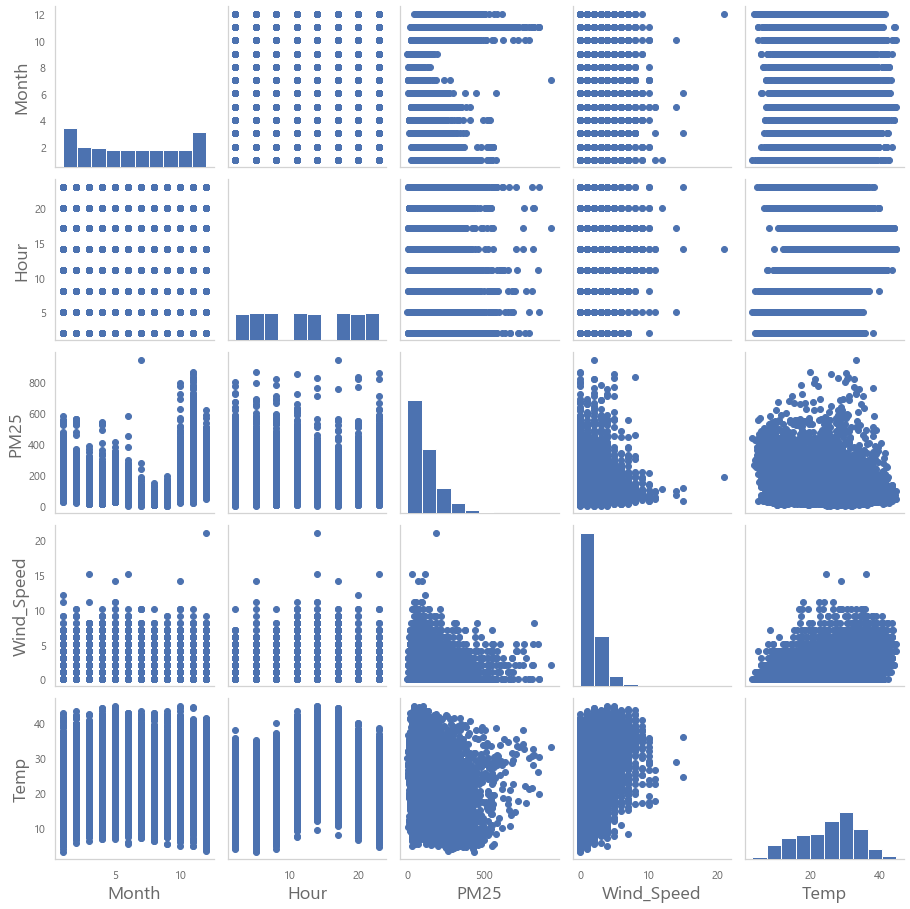

In [126]:
g = sns.PairGrid(df, vars=["Month", "Hour", "PM25", "Wind_Speed", "Temp"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

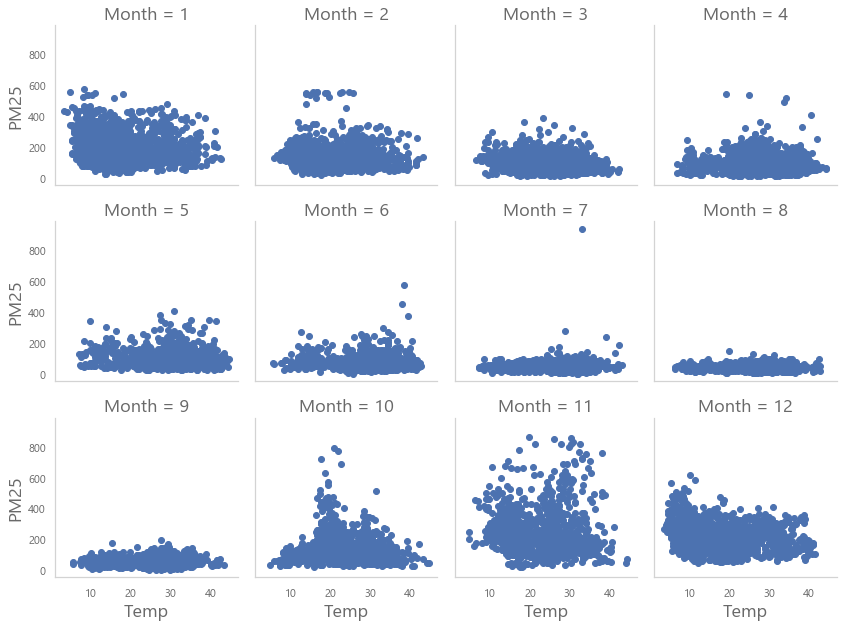

In [127]:
g = sns.FacetGrid(df, col='Month', col_wrap=4)
g.map(plt.scatter, "Temp","PM25")
plt.show()

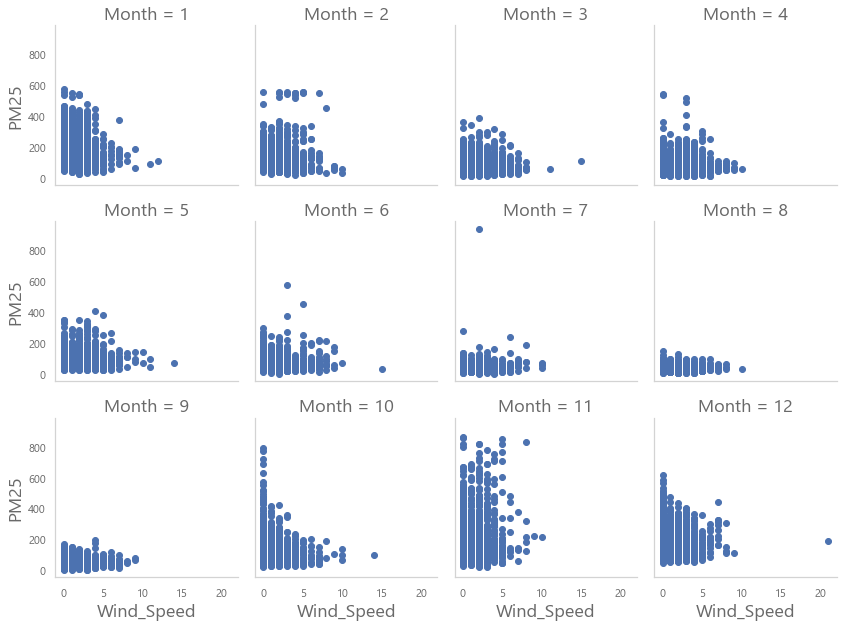

In [129]:
g = sns.FacetGrid(df, col='Month', col_wrap=4)
g.map(plt.scatter,"Wind_Speed", "PM25")
plt.show()

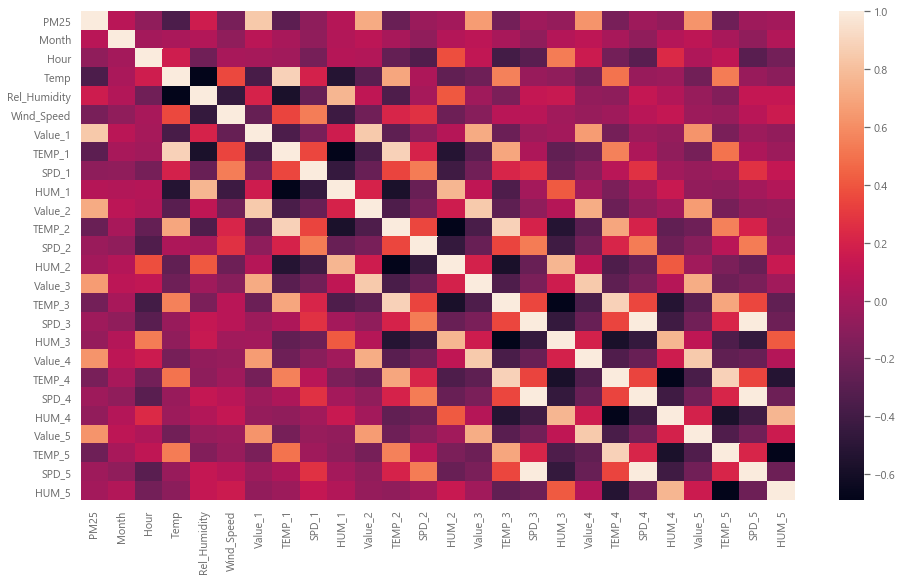

In [130]:
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

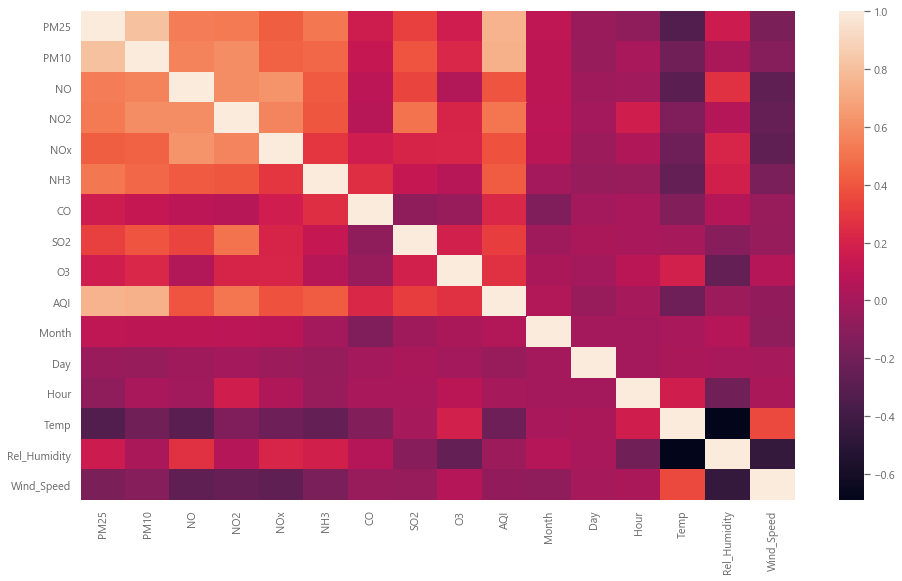

In [131]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [132]:
data = df2.drop(['Date'], axis=1)
data.columns

Index(['PM25', 'Month', 'Hour', 'Temp', 'Rel_Humidity', 'Wind_Speed',
       'Value_1', 'TEMP_1', 'SPD_1', 'HUM_1', 'Value_2', 'TEMP_2', 'SPD_2',
       'HUM_2', 'Value_3', 'TEMP_3', 'SPD_3', 'HUM_3', 'Value_4', 'TEMP_4',
       'SPD_4', 'HUM_4', 'Value_5', 'TEMP_5', 'SPD_5', 'HUM_5'],
      dtype='object')

In [134]:
cols = data.columns.tolist()

In [135]:
#Export cleaned dataset
data.to_csv('final_datset_cleaned.csv')

# Applying Machine Learning Algorithms

First, we need to split our data into training and testing data. Then, we build different models and compare their performance to see which works best. I will be looking at RMS Error and choose the model with the lowest value. We shall compare simple regression with a decision tree approach to see which works better.

In [136]:
y = data['PM25']
X = data.drop(['PM25'], axis=1)

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [138]:
X_train.shape, y_train.shape

((10245, 25), (10245,))

In [139]:
X_test.shape, y_test.shape

((4391, 25), (4391,))

## Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [142]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [143]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [144]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.7439481230676919

In [145]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [ 0.13192948 -0.63677194 -1.35821042  0.14679212  0.94951544  0.78612059
  1.72251308  0.16433038 -0.32269178 -0.13021655 -0.45065156  0.23433836
  0.18550148  0.10237776 -1.64244532 -0.12823579 -0.06213148  0.01060794
  2.92095736 -0.12823579 -0.25399549  0.13067736 -1.72694639 -0.12823579
  0.12411654]
Root mean squared error: 45.27
Mean absolute error: 28.68
R-squared: 0.74


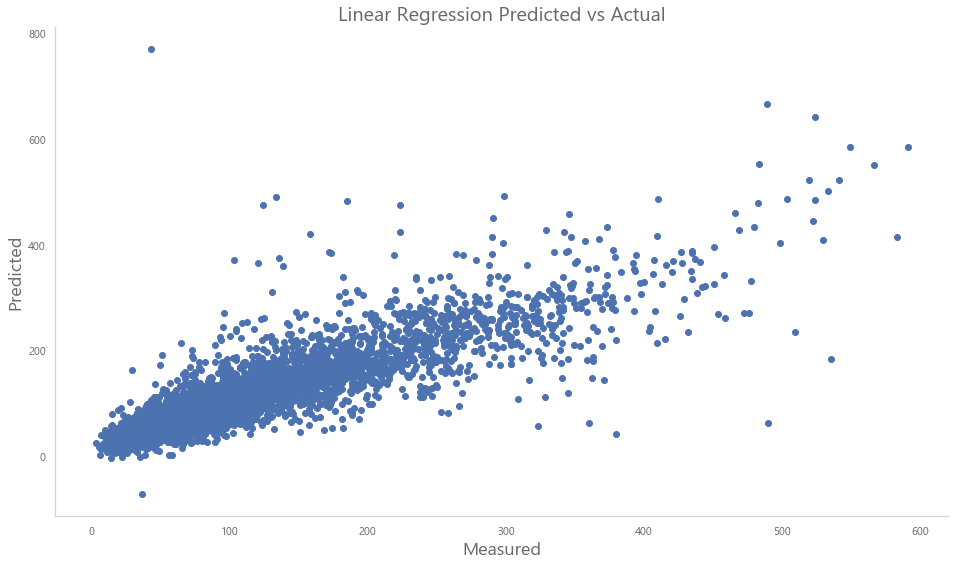

In [146]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

## Random Forest Regressor

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [148]:
regr_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=1234)

In [149]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.7997287627272069

In [150]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [151]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 40.03
Mean absolute error: 24.95
R-squared: 0.80


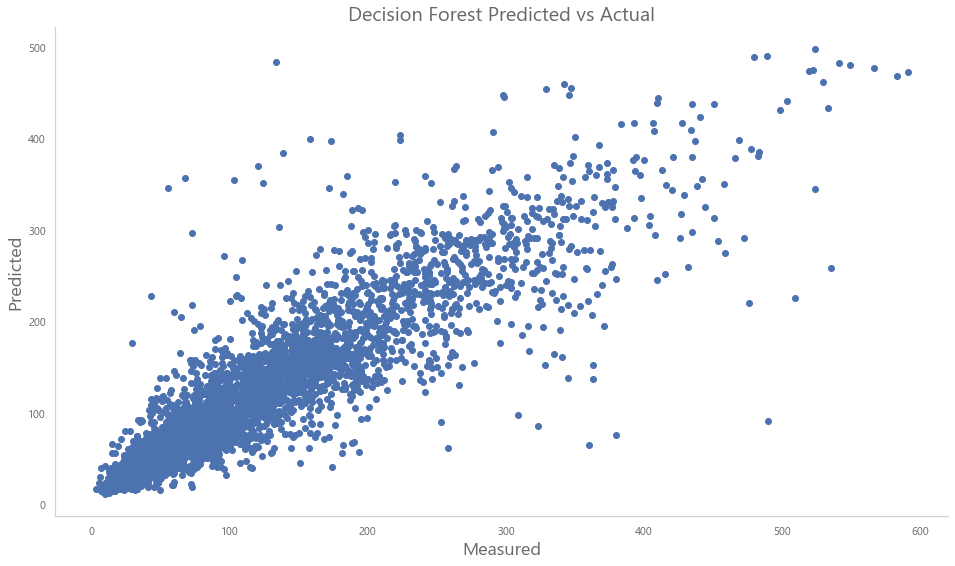

In [172]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

The Random Forest regressor outperformed linear regression, and it gives a better fit with lower RMS error.